# Projeto: análise de um conjunto de dados referente aos tripulantes e passageiros a bordo do Titanic

## Conteúdo
<ul>
<li><a href="#intro">Introdução</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#labels_considerations">Observações sobre os rótulos de colunas</a></li>
    </ul>
<li><a href="#data_cleaning">Data Cleaning</a></li>
        <ul>
            <li><a href="#column_removal">Remoção de colunas desnecessárias</a></li>
            <li><a href="#label_update">Atualização do padrão dos rótulos de coluna</a></li>
            <li><a href="#null_treatment">Tratamento de colunas com valores nulos</a></li>
            <li><a href="#datatype_change">Mudanças de tipo de dados</a></li> 
        </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#question_1">Questão 1: qual é a relação entre a idade e o fato de ser um sobrevivente ou um não-sobrevivente?</a></li>
        <li><a href="#question_2">Questão 2: qual a relação entre a classe do bilhete entre os sobreviventes e os não-sobreviventes?</a></li>
        <li><a href="#question_3">Questão 3: qual a relevância do sexo em relação à sobrevivência?</a></li>
    </ul>
<li><a href="#conclusions">Conclusões</a></li>
</ul>

<a id='intro'></a>
## Introdução

*"O acidente do RMS Titatic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem de estreia, o Titanic afundou depois de colidir com um iceberg provocando a morte de 1502 dos seus 2224 passageiros e tripulação. Tal tragédia chocou a comunidade internacional e levou a regulamentos de segurança mais rígidos para embarcações"*
<br>
*(tradução livre do <a href="https://www.kaggle.com/c/titanic">**texto original**</a>)*
<br>
<br>
A presente análise tem o untuito de explorar um dataset que contém dados dos passageiros e da tripulação do RMS Titanic em sua primeira e única viagem.

In [1]:
# importação de pacotes e carregamento dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('titanic-data-6.csv')

<a id='wrangling'></a>
## Data Wrangling

### Propriedades Gerais

In [2]:
#(número de linhas, número de colunas)
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Inicialmente o dataset apresenta 891 linhas e 12 colunas.
<a id="labels_considerations"></a>
#### Observações sobre os rótulos de colunas:

<ul>
    <li>Survived: 0 significa que o passageiro em questão não sobreviveu e 1, que o passageiro sobreviveu</li>
    <li>Pclass: classe da passage (1 é primeira classe, etc...)</li>
    <li>SibSp: número de irmãos / cônjuges a bordo do navio</li>
    <li>Parch: número de pais / filhos a bordo do navio</li>
    <li>Fare: tarifa paga pelo passageiro</li>
    <li>Cabin: número da cabine</li>
    <li>Embarked: local de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>

*Para mais detalhes consultar <a href="https://www.kaggle.com/c/titanic/data">este link</a>*

In [4]:
#estrutura inicial do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="data_cleaning"></a>
### Data Cleaning

Como se pode notar na seção anterior alguns ajustes precisam ser feitos no dataset para garantir a qualidade da análise.

<a id="column_removal"></a>
#### Remoção de colunas desnecessárias
Os números apresentados na coluna **PassengerId** acompanham o índice automático atribuído pelo *pandas*. Neste caso pode-se optar em transformar a coluna citada em índice ou excluí-la e utilizar o índice automático. A segunda opção foi escolhida.
Para fins desta análise as seguintes colunas serão desconsideradas: PassengerId, Name, SibSp, Parch, Ticket, Fare, Cabin, Embarked. Tal decisão deve-se ao fato de a observação inicial dos dados apontar a irrelevância das colunas desconsideradas na questão da sobrevivência dos passageiros e da tripulação.

In [5]:
#remoção de colunas
cols_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

df.drop(cols_to_drop, axis=1, inplace=True)

#verificação
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


<a id="label_update"></a>
#### Atualização do padrão dos rótulos de coluna
Para facilitar a legibilidade os rótulos serão atualizados de forma a apresentarem apenas letras minúsculas

In [6]:
df.rename(columns = lambda x: x.lower(), inplace=True)

df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


<a id="null_treatment"></a>
#### Tratamento de colunas com valores nulos
Ao se verificar a estrutura atual do dataframe pode-se notar que a coluna **age** apresenta 177 valores nulos. Como essas linhas representam 19,86% do dataframe seria imprudente descartá-las da análise. Para corrigir o problema os valores nulos serão preenchidos com a média das idades apresentadas na coluna citada. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [8]:
df['age'].isnull().sum()

177

In [9]:
#cálculo da média das idades
age_mean = df['age'].mean()

#preenchimento dos valores vazios na coluna "age"
df['age'].fillna(age_mean, inplace=True)

#verificação da operação
df['age'].isnull().sum()

0

<a id="datatype_change"></a>
#### Mudanças de tipo de dados

Os dados da coluna **survived** são do tipo *int* e os da coluna **age**, *float*. Para melhorar a legibidade dos dados será usado o tipo *bool* para **survived** e *int* para **age**

In [10]:
#conversão da coluna survived
df['survived'] = df['survived'].astype(bool)

#conversão da coluna age
df['age'] = df['age'].astype(int)

In [11]:
df.head()

,survived,pclass,sex,age
0,False,3,male,22
1,True,1,female,38
2,True,3,female,26
3,True,1,female,35
4,False,3,male,35


<a id='eda'></a>
## Exploratory Data Analysis
<a id="question_1"></a>
### Questão 1: qual é a relação entre a idade e o fato de ser um sobrevivente ou um não-sobrevivente?


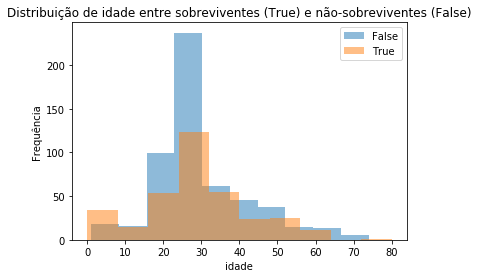

In [12]:
# visualização do histograma
df.groupby('survived')['age'].plot.hist(alpha=0.5);
plt.ylabel('Frequência');
plt.xlabel('idade');
plt.title('Distribuição de idade entre sobreviventes (True) e não-sobreviventes (False)');
#plt.legend(['não-sob', 'sob'])
plt.legend();

O histograma acima evidencia o fato de que tanto o grupo de sobreviventes quanto o de não sobreviventes apresenta uma distribuição assimétrica com distorção à direita. Pode-se notar que, exceto passageiros na faixa dos 10 anos, todas as etárias apresentam um número maior de não sobreviventes do que de sobreviventes (com destaque para a faixa de 25 a 35 anos, na qual o número de não sobreviventes é muito superior ao de não-sobreviventes).

<a id="question_2"></a>
### Questão 2: qual a relação entre a classe do bilhete entre os sobreviventes e os não-sobreviventes?

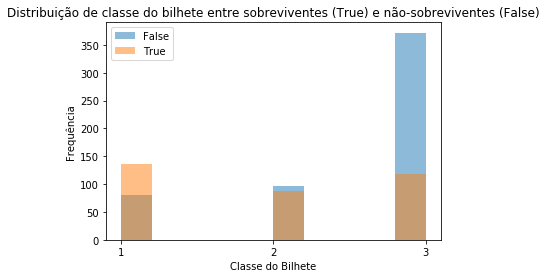

In [13]:
df.groupby('survived')['pclass'].plot.hist(alpha=0.5);
plt.ylabel('Frequência');
plt.xlabel('Classe do Bilhete');
plt.title('Distribuição de classe do bilhete entre sobreviventes (True) e não-sobreviventes (False)');
plt.xticks([1, 2, 3])
plt.legend();

Com base no histograma acima pode-se afirmar que, dentre passageiros de uma mesma classe, a maior parte das baixas ocorreu entre passageiros da classe C enquanto o maior número de sobreviventes está entre os passageiros da classe A. 

<a id="question_3"></a>
### Questão 3: qual a relevância do sexo em relação à sobrevivência?

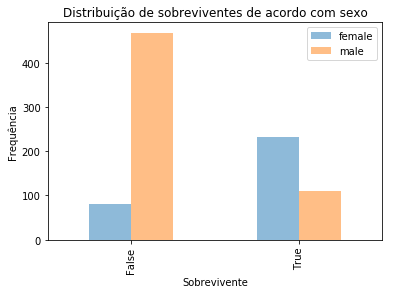

In [17]:
df.groupby(['survived', 'sex']).count()['age'].unstack().plot.bar(alpha=0.5);
plt.ylabel('Frequência');
plt.xlabel('Sobrevivente');
plt.title('Distribuição de sobreviventes de acordo com sexo');
plt.legend();

De acordo com o histograma acima nota-se que a maior parte dos sobreviventes é do sexo feminino.

<a id='conclusions'></a>
## Conclusões

Após a aplicação de todas as etapas inerentes ao processo de análise de dados algumas conclusões relevantes foram tiradas a respeito do dataset em questão. A combinação das respostas das duas perguntas feitas durante a análise exploratória de dados apontou para o fato de que a maioria dos sobreviventes do naufrágio do navio Titanic se encontra na faixa dos 20 aos 40 anos e que a maior (e uma das únicas poucas) faixa etária a apresenta número maior de sobreviventes do que de não-sobreviventes foi a de 0 a 10 anos.  Além disso o maior grupo de sobreviventes é do sexo feminino. Em proporção, a maior parte dos passageiros que não sobreviveram ao acidente foi aquela que comprara bilhetes da classe C.